In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_url = 'https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv'
cancer = pd.read_csv(data_url)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer.shape

(569, 33)

In [ ]:
cancer.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
cancer.drop(['id'], axis = 1, inplace = True)

In [ ]:
cancer.shape

(569, 31)

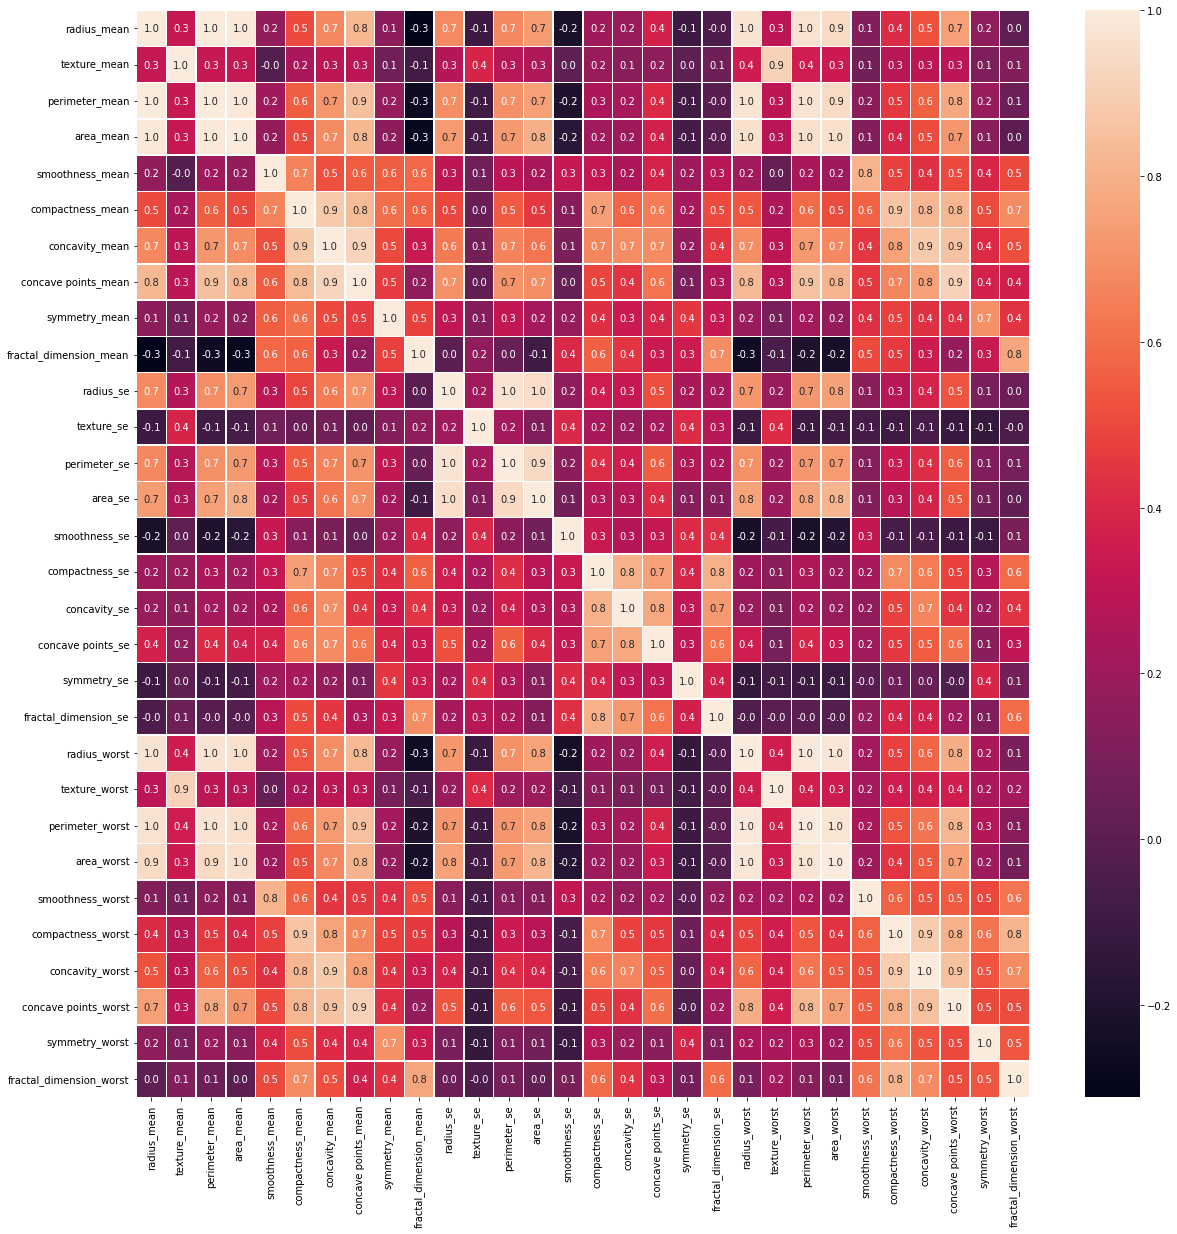

In [ ]:
correlated_features = set()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cancer.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
correlated_features = set()
correlation_matrix = cancer.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
print('\033[1m',"Total Features:                   ", '\033[0m',len(cancer.columns))
print('\033[1m',"Features with > 70% correlation:  ", '\033[0m',len(correlated_features))
print("                                                            ")
print('\033[1m',"Correlated Features:",'\033[0m',*correlated_features,sep='\n')

 Total Features:                     31
 Features with > 70% correlation:    20
                                                            

Correlated Features:

area_worst
concavity_mean
texture_worst
area_mean
perimeter_se
smoothness_worst
area_se
concave points_worst
compactness_se
concavity_se
radius_worst
compactness_worst
perimeter_mean
fractal_dimension_worst
concavity_worst
fractal_dimension_se
concave points_mean
radius_se
perimeter_worst
concave points_se


In [ ]:
cancer.drop(["area_worst","concavity_mean","texture_worst","area_mean","perimeter_se","smoothness_worst",
                              "area_se","concave points_worst","compactness_se","concavity_se","radius_worst","compactness_worst",
                               "perimeter_mean", "fractal_dimension_worst", "concavity_worst",
                               "fractal_dimension_se", "concave points_mean", "radius_se",
                               "perimeter_worst", "concave points_se"], axis = 1,inplace=True)


In [ ]:
cancer.shape

(569, 11)

In [ ]:
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'symmetry_se', 'symmetry_worst'],
      dtype='object')

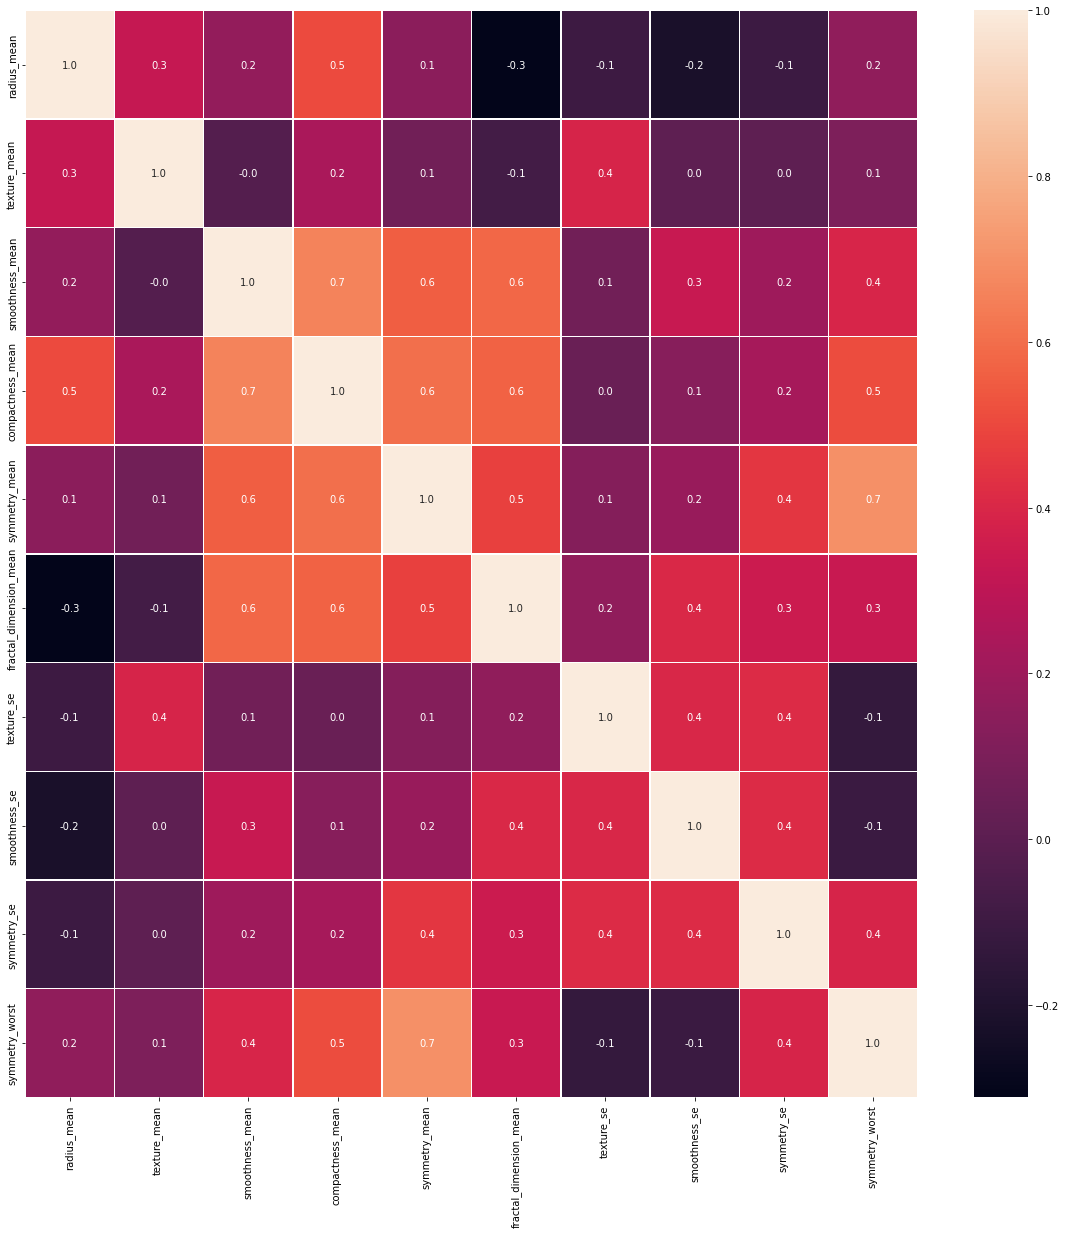

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cancer.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
cancer['target'] = cancer['diagnosis'].map({0:'B',1:'M'})
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'symmetry_se', 'symmetry_worst',
       'target'],
      dtype='object')

In [ ]:
X = cancer.drop(["diagnosis","target"], axis = 1)
y = cancer['diagnosis']


print(X.shape)
print(y.shape)

(569, 10)
(569,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

logistic_cm = confusion_matrix(y_test, y_pred)
logistic_accuracy = accuracy_score(y_test,y_pred)
logistic_error = 1 - logistic_accuracy
#logistic_f1 = 65 / 65 + (0.5 * (3 + 4))

print(logistic_cm)
print("Logistic Regression Accuracy:               ", str(logistic_accuracy))
print("Logistic Regression Misclassification Rate: ", str(logistic_error))
#print("Logistic Regression F1 Score:               ", str(qda_f1))

[[103   5]
 [  8  55]]
Logistic Regression Accuracy:                0.9239766081871345
Logistic Regression Misclassification Rate:  0.07602339181286555


              precision    recall  f1-score   support

           B       0.93      0.95      0.94       108
           M       0.92      0.87      0.89        63

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



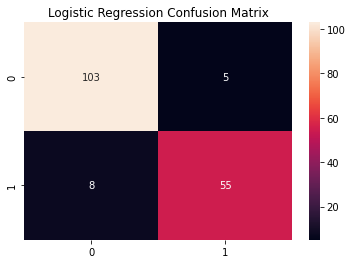

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

ax = plt.axes()
sns.heatmap(logistic_cm,annot=True,fmt="",ax = ax)
ax.set_title('Logistic Regression Confusion Matrix')
plt.show()